In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import pandas as pd

%matplotlib inline

In [2]:
df_airline=pd.read_csv('airline_passengers.csv')
df_airline.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [3]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [4]:
df_airline.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [6]:
df_airline.dropna(axis=0,inplace=True)

In [7]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [8]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [9]:
df_airline['Month']=pd.to_datetime(df_airline['Month'])

In [10]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [11]:
df_airline.head()

,Month,Thousands of Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [12]:
df_airline.set_index('Month',inplace=True)

In [13]:
df_airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


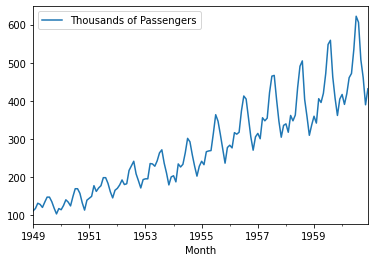

In [14]:
df_airline.plot()                # this is seasonal data

In [15]:

from statsmodels.tsa.stattools import adfuller

In [16]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [17]:
adf_test(df_airline['Thousands of Passengers'])

ADF Statistics: 0.8153688792060462
p- value: 0.991880243437641
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [18]:
## Use Techniques Differencing
df_airline['Passengers First Difference']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(1)

In [19]:
df_airline.head()

,Thousands of Passengers,Passengers First Difference
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0


In [20]:
adf_test(df_airline['Passengers First Difference'].dropna())

ADF Statistics: -2.8292668241699848
p- value: 0.054213290283827514
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [21]:
## Use Techniques Differencing
df_airline['Passengers Second Difference']=df_airline['Passengers First Difference']-df_airline['Passengers First Difference'].shift(1)

In [22]:
adf_test(df_airline['Passengers Second Difference'].dropna())

ADF Statistics: -16.384231542468452
p- value: 2.732891850014516e-29
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [23]:
### 12 months 
## Use Techniques Differencing
df_airline['Passengers 12 Difference']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(12)

In [24]:
adf_test(df_airline['Passengers 12 Difference'].dropna())

ADF Statistics: -3.383020726492481
p- value: 0.011551493085514952
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [29]:
df_airline

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1960-08-01,606.0,-16.0,-103.0,47.0
1960-09-01,508.0,-98.0,-82.0,45.0
1960-10-01,461.0,-47.0,51.0,54.0


In [27]:

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

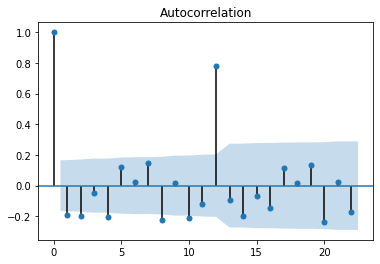

In [28]:
acf = plot_acf(df_airline["Passengers Second Difference"].dropna())

In [ ]:
# q=6 , it  impact more 

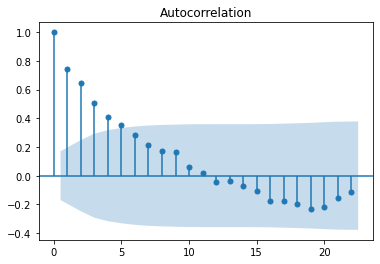

In [28]:
acf12 = plot_acf(df_airline["Passengers 12 Difference"].dropna())
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())

In [ ]:
# q=5   it impact more , u can above

C:\Users\ALI\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


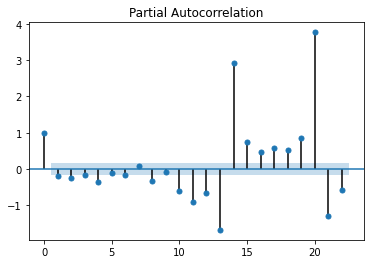

In [30]:
result = plot_pacf(df_airline["Passengers Second Difference"].dropna())

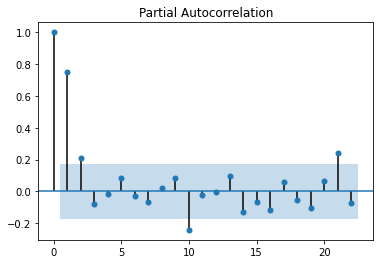

In [31]:
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())

In [32]:
### split train and test data
df_airline

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1960-08-01,606.0,-16.0,-103.0,47.0
1960-09-01,508.0,-98.0,-82.0,45.0
1960-10-01,461.0,-47.0,51.0,54.0


In [33]:
from datetime import datetime,timedelta
train_dataset_end=datetime(1955,12,1)
test_dataset_end=datetime(1960,12,1)

In [35]:
train_data=df_airline[:train_dataset_end]
test_data=df_airline[train_dataset_end+timedelta(days=1):test_dataset_end]

In [36]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [37]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0
1956-06-01,374.0,56.0,51.0,59.0
1956-07-01,413.0,39.0,-17.0,49.0
1956-08-01,405.0,-8.0,-47.0,58.0
1956-09-01,355.0,-50.0,-42.0,43.0


In [39]:
## create a ARIMA model
from statsmodels.tsa.arima_model import ARIMA

In [40]:
train_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1955-08-01,347.0,-17.0,-66.0,54.0
1955-09-01,312.0,-35.0,-18.0,53.0
1955-10-01,274.0,-38.0,-3.0,45.0


In [44]:
model_ARIMA=ARIMA(train_data['Thousands of Passengers'],order=(10,2,0))

C:\Users\ALI\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ALI\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [45]:
model_Arima_fit=model_ARIMA.fit()

In [46]:
model_Arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ARIMA Model Results                                  
======================================================================================
Dep. Variable:     D2.Thousands of Passengers   No. Observations:                   82
Model:                        ARIMA(10, 2, 0)   Log Likelihood                -357.239
Method:                               css-mle   S.D. of innovations             18.333
Date:                        Wed, 02 Mar 2022   AIC                            738.477
Time:                                23:04:33   BIC                            767.358
Sample:                            03-01-1949   HQIC                           750.072
                                 - 12-01-1955                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 0.0164      0.347      0.047      0.962      -0.665       0.697
ar.L1.D2.Thousands of Passengers     -0.5165      0.097     -5.300      0.000      -0.707      -0.325
ar.L2.D2.Thousands of Passengers     -0.7203      0.108     -6.650      0.000      -0.933      -0.508
ar.L3.D2.Thousands of Passengers     -0.4856      0.120     -4.032      0.000      -0.722      -0.250
ar.L4.D2.Thousands of Passengers     -0.7506      0.131     -5.717      0.000      -1.008      -0.493
ar.L5.D2.Thousands of Passengers     -0.5065      0.151     -3.360      0.001      -0.802      -0.211
ar.L6.D2.Thousands of Passengers     -0.5204      0.149     -3.500      0.000      -0.812      -0.229
ar.L7.D2.Thousands of Passengers     -0.3055      0.136     -2.250      0.024      -0.572      -0.039
ar.L8.D2.Thousands of Passengers     -0.5943      0.125     -4.744      0.000      -0.840      -0.349
ar.L9.D2.Thousands of Passengers     -0.2966      0.116     -2.556      0.011      -0.524      -0.069
ar.L10.D2.Thousands of Passengers    -0.4826      0.101     -4.765      0.000      -0.681      -0.284
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             0.9098           -0.5670j            1.0720           -0.0887
AR.2             0.9098           +0.5670j            1.0720            0.0887
AR.3             0.4844           -0.9210j            1.0406           -0.1729
AR.4             0.4844           +0.9210j            1.0406            0.1729
AR.5            -0.9676           -0.4146j            1.0527           -0.4356
AR.6            -0.9676           +0.4146j            1.0527            0.4356
AR.7            -0.6004           -0.8889j            1.0726           -0.3445
AR.8            -0.6004           +0.8889j            1.0726            0.3445
AR.9            -0.1335           -1.1349j            1.1427           -0.2686
AR.10           -0.1335           +1.1349j            1.1427            0.2686
------------------------------------------------------------------------------
"""

In [128]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference,Predicted_ARIMA,Predicted_SARIMA
Month,,,,,,
1956-01-01,284.0,6.0,-35.0,42.0,-18.162150,NaN
1956-02-01,277.0,-7.0,-13.0,44.0,-45.477686,NaN
1956-03-01,317.0,40.0,47.0,50.0,36.823887,NaN
1956-04-01,313.0,-4.0,-44.0,44.0,-13.751486,NaN
1956-05-01,318.0,5.0,9.0,48.0,-24.008603,NaN
1956-06-01,374.0,56.0,51.0,59.0,47.695447,NaN
1956-07-01,413.0,39.0,-17.0,49.0,-17.190004,399.012415
1956-08-01,405.0,-8.0,-47.0,58.0,-31.682662,382.942369
1956-09-01,355.0,-50.0,-42.0,43.0,45.053450,347.541878


In [47]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [48]:
pred=model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['Thousands of Passengers']-pred

In [49]:
pred

1956-01-01   -18.695964
1956-02-01   -12.830814
1956-03-01    -2.329668
1956-04-01   -15.562171
1956-05-01    19.310684
1956-06-01    19.647929
1956-07-01   -13.271455
1956-08-01   -36.529633
1956-09-01     4.998658
1956-10-01    -9.913213
1956-11-01    28.288489
1956-12-01    24.352209
1957-01-01   -18.119966
1957-02-01    -3.741479
1957-03-01   -11.652374
1957-04-01     4.801838
1957-05-01    11.674263
1957-06-01     8.980659
1957-07-01   -18.932089
1957-08-01   -10.557323
1957-09-01     0.734727
1957-10-01     0.773627
1957-11-01    23.197641
1957-12-01    -1.112060
1958-01-01    -7.244807
1958-02-01    -7.413856
1958-03-01    -2.318089
1958-04-01     6.169887
1958-05-01     7.709340
1958-06-01    -0.056475
1958-07-01   -13.184592
1958-08-01    -0.771350
1958-09-01    -1.976039
1958-10-01     8.806765
1958-11-01     8.451449
1958-12-01    -4.117848
1959-01-01    -4.677806
1959-02-01    -5.031466
1959-03-01     2.660265
1959-04-01     3.850247
1959-05-01     4.913927
1959-06-01    -5

In [50]:
residuals

Month
1956-01-01    302.695964
1956-02-01    289.830814
1956-03-01    319.329668
1956-04-01    328.562171
1956-05-01    298.689316
1956-06-01    354.352071
1956-07-01    426.271455
1956-08-01    441.529633
1956-09-01    350.001342
1956-10-01    315.913213
1956-11-01    242.711511
1956-12-01    281.647791
1957-01-01    333.119966
1957-02-01    304.741479
1957-03-01    367.652374
1957-04-01    343.198162
1957-05-01    343.325737
1957-06-01    413.019341
1957-07-01    483.932089
1957-08-01    477.557323
1957-09-01    403.265273
1957-10-01    346.226373
1957-11-01    281.802359
1957-12-01    337.112060
1958-01-01    347.244807
1958-02-01    325.413856
1958-03-01    364.318089
1958-04-01    341.830113
1958-05-01    355.290660
1958-06-01    435.056475
1958-07-01    504.184592
1958-08-01    505.771350
1958-09-01    405.976039
1958-10-01    350.193235
1958-11-01    301.548551
1958-12-01    341.117848
1959-01-01    364.677806
1959-02-01    347.031466
1959-03-01    403.339735
1959-04-01    392.1

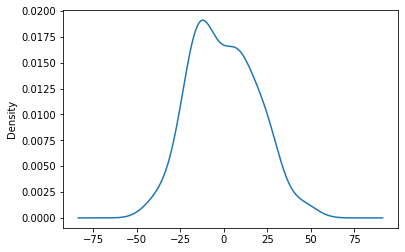

In [51]:
model_Arima_fit.resid.plot(kind='kde')

In [52]:
test_data['Predicted_ARIMA']=pred

C:\Users\ALI\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


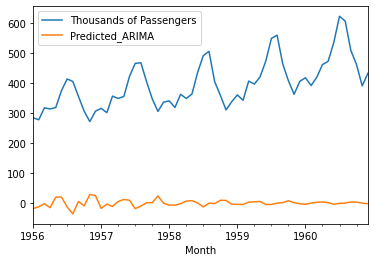

In [53]:
test_data[['Thousands of Passengers','Predicted_ARIMA']].plot()

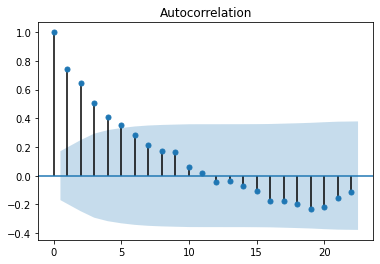

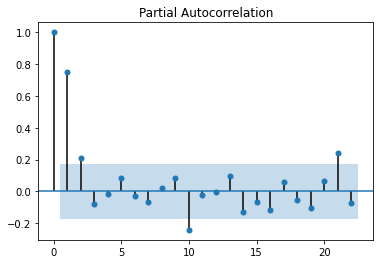

In [54]:
acf12 = plot_acf(df_airline["Passengers 12 Difference"].dropna())
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())

In [55]:
## create a SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [56]:
model_SARIMA=SARIMAX(train_data['Thousands of Passengers'],order=(3,0,5),seasonal_order=(0,1,0,12))

C:\Users\ALI\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ALI\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [57]:
model_SARIMA_fit=model_SARIMA.fit()

C:\Users\ALI\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [58]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:             Thousands of Passengers   No. Observations:                   84
Model:             SARIMAX(3, 0, 5)x(0, 1, [], 12)   Log Likelihood                -265.240
Date:                             Wed, 02 Mar 2022   AIC                            548.481
Time:                                     23:12:41   BIC                            568.971
Sample:                                 01-01-1949   HQIC                           556.638
                                      - 12-01-1955                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5980      0.937      0.638      0.524      -1.239       2.435
ar.L2          0.8311      0.232      3.582      0.000       0.376       1.286
ar.L3         -0.4522      0.894     -0.506      0.613      -2.204       1.299
ma.L1          0.1841      1.165      0.158      0.874      -2.100       2.468
ma.L2         -0.5338      1.263     -0.423      0.672      -3.009       1.941
ma.L3         -0.0987      0.385     -0.257      0.797      -0.852       0.655
ma.L4         -0.1273      0.338     -0.377      0.706      -0.790       0.535
ma.L5          0.2471      0.357      0.692      0.489      -0.453       0.947
sigma2        87.7340     81.283      1.079      0.280     -71.578     247.046
===================================================================================
Ljung-Box (Q):                       27.22   Jarque-Bera (JB):                 2.68
Prob(Q):                              0.94   Prob(JB):                         0.26
Heteroskedasticity (H):               2.05   Skew:                             0.46
Prob(H) (two-sided):                  0.09   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [59]:
test_data.tail()

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference,Predicted_ARIMA
Month,,,,,
1960-08-01,606.0,-16.0,-103.0,47.0,-0.615669
1960-09-01,508.0,-98.0,-82.0,45.0,3.106044
1960-10-01,461.0,-47.0,51.0,54.0,2.964138
1960-11-01,390.0,-71.0,-24.0,28.0,-0.732251
1960-12-01,432.0,42.0,113.0,27.0,-2.251374


In [60]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [61]:
pred_Sarima=model_SARIMA_fit.predict(start=datetime(1956,6,6),end=datetime(1960,12,1))
residuals=test_data['Thousands of Passengers']-pred_Sarima

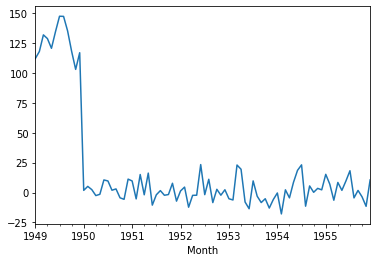

In [62]:
model_SARIMA_fit.resid.plot()

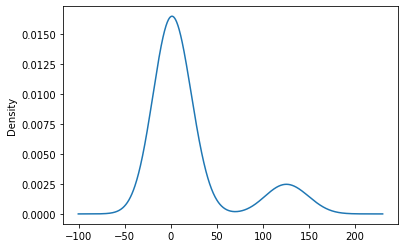

In [63]:
model_SARIMA_fit.resid.plot(kind='kde')

In [64]:
test_data['Predicted_SARIMA']=pred_Sarima

C:\Users\ALI\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [65]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference,Predicted_ARIMA,Predicted_SARIMA
Month,,,,,,
1956-01-01,284.0,6.0,-35.0,42.0,-18.695964,NaN
1956-02-01,277.0,-7.0,-13.0,44.0,-12.830814,NaN
1956-03-01,317.0,40.0,47.0,50.0,-2.329668,NaN
1956-04-01,313.0,-4.0,-44.0,44.0,-15.562171,NaN
1956-05-01,318.0,5.0,9.0,48.0,19.310684,NaN
1956-06-01,374.0,56.0,51.0,59.0,19.647929,NaN
1956-07-01,413.0,39.0,-17.0,49.0,-13.271455,403.398256
1956-08-01,405.0,-8.0,-47.0,58.0,-36.529633,385.071313
1956-09-01,355.0,-50.0,-42.0,43.0,4.998658,349.446049


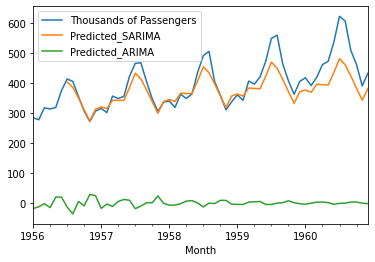

In [66]:
test_data[['Thousands of Passengers','Predicted_SARIMA','Predicted_ARIMA']].plot()